# Plotly HTMLs
---

Notebook where I create plotly plots in HTML, so as to embed in some web page.

## Importing the necessary packages

In [1]:
import os                                  # os handles directory/workspace changes
import yaml                                # Save and load YAML files
import pandas as pd                        # Pandas to load and handle the data
import plotly.graph_objects as go          # Plotly for interactive and pretty plots
import plotly.io as pio                    # Save Plotly graphs

## Plotting

### Medscape burnouts

https://www.medscape.com/slideshow/2019-global-burnout-comparison-6011180#4

#### Data

In [ ]:
x_data = [22, 27, 28, 12, 38, 37]
y_data = ['UK', 'US', 'France', 'Germany', 'Portugal', 'Spain']

#### Plot configuration

In [ ]:
font = 'Roboto'
font_size = 20
font_color = '#ffffff'
background_color = '#2f528f'
bar_color = '#ffffff'
x_suffix = '%'

#### Plot

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=y_data,
    x=x_data,
    orientation='h',
    marker=dict(
        color=bar_color
    )
))
fig.update_layout(
    title='Percentage of burned out physicians',
    font=dict(
        family=font,
        size=font_size,
        color=font_color
    ),
    paper_bgcolor=background_color,
    plot_bgcolor=background_color,
    xaxis=dict(
        ticksuffix=x_suffix
    ),
    yaxis=dict(
        categoryorder='category descending'
    )
)
fig

In [ ]:
pio.write_html(fig, file='medscape_burnouts.html', auto_open=True)

### Thesis model component impact

Measuring the average gain in performance that we get from the components of bidirectionality, embedding layer and time awareness.

#### Data

In [2]:
# Change to parent directory (presumably "Documents")
os.chdir("../..")

In [3]:
# Path to the metrics
metrics_path = 'GitHub/FCUL_ALS_Disease_Progression/metrics/aggregate/'

In [4]:
metrics_files = os.listdir(metrics_path)
try:
    metrics_files.remove('.DS_Store')
except:
    pass
metrics_files

['rnn_bidir_one_hot_encoded_90dayswindow.yml',
 'xgb.yml',
 'mf1lstm_one_hot_encoded_90dayswindow.yml',
 'logreg.yml',
 'rnn_one_hot_encoded_delta_ts_90dayswindow.yml',
 'lstm_bidir_one_hot_encoded_90dayswindow.yml',
 'lstm_one_hot_encoded_delta_ts_90dayswindow.yml',
 'tlstm_pre_embedded_90dayswindow.yml',
 'rnn_one_hot_encoded_90dayswindow.yml',
 'lstm_bidir_one_hot_encoded_delta_ts_90dayswindow.yml',
 'tlstm_one_hot_encoded_90dayswindow.yml',
 'rnn_bidir_pre_embedded_90dayswindow.yml',
 'lstm_bidir_pre_embedded_90dayswindow.yml',
 'rnn_bidir_one_hot_encoded_delta_ts_90dayswindow.yml',
 'rnn_pre_embedded_delta_ts_90dayswindow.yml',
 'mf1lstm_pre_embedded_90dayswindow.yml',
 'lstm_bidir_pre_embedded_delta_ts_90dayswindow.yml',
 'lstm_pre_embedded_delta_ts_90dayswindow.yml',
 'rnn_with_embedding_90dayswindow.yml',
 'lstm_pre_embedded_90dayswindow.yml',
 'lstm_one_hot_encoded_90dayswindow.yml',
 'rnn_bidir_pre_embedded_delta_ts_90dayswindow.yml',
 'mf2lstm_one_hot_encoded_90dayswindow.ym

Create a dictionary with all the metrics:

In [5]:
metrics = dict()
for file_name in metrics_files:
    # Load the current metrics file
    stream = open(f'{metrics_path}{file_name}', 'r')
    model_metrics = yaml.load(stream, Loader=yaml.FullLoader)
    # Remove the extension from the name
    file_name = file_name.split('.yml')[0]
    # Define the model name which will appear in the table
    model_name = ''
    if 'bidir' in file_name:
        model_name = 'Bidirectional '
    if 'tlstm' in file_name:
        model_name += 'TLSTM'
    elif 'mf1lstm' in file_name:
        model_name += 'MF1-LSTM'
    elif 'mf2lstm' in file_name:
        model_name += 'MF2-LSTM'
    elif 'lstm' in file_name:
        model_name += 'LSTM'
    elif 'rnn' in file_name:
        model_name += 'RNN'
    elif 'xgb' in file_name:
        model_name += 'XGBoost'
    elif 'logreg' in file_name:
        model_name += 'Logistic Regression'
    elif 'svm' in file_name:
        model_name += 'SVM'
    if 'embed' in file_name:
        model_name += ', embedded'
    if 'delta_ts' in file_name:
        model_name += ', time aware'
    # Create a dictionary entry for the current model
    metrics[model_name] = dict()
    metrics[model_name]['Avg. Test AUC'] = model_metrics['test']['AUC']['mean']
    metrics[model_name]['Std. Test AUC'] = model_metrics['test']['AUC']['std']

Convert to a dataframe:

In [6]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,Bidirectional RNN,XGBoost,MF1-LSTM,Logistic Regression,"RNN, time aware",Bidirectional LSTM,"LSTM, time aware","TLSTM, embedded",RNN,"Bidirectional LSTM, time aware",...,"MF1-LSTM, embedded","Bidirectional LSTM, embedded, time aware","LSTM, embedded, time aware","RNN, embedded","LSTM, embedded",LSTM,"Bidirectional RNN, embedded, time aware",MF2-LSTM,"MF2-LSTM, embedded",SVM
Avg. Test AUC,0.888364,0.833373,0.675305,0.781677,0.798767,0.916037,0.795249,0.649291,0.797243,0.937405,...,0.648051,0.915068,0.822787,0.787666,0.785448,0.793016,0.896575,0.668578,0.653309,0.440693
Std. Test AUC,0.025372,0.035517,0.027665,0.003030,0.030467,0.016473,0.033168,0.016514,0.014516,0.025812,...,0.008728,0.021216,0.035039,0.025880,0.021874,0.022835,0.022189,0.023623,0.017099,0.017162


Transpose to have a row per model:

In [7]:
metrics_df = metrics_df.transpose()
metrics_df

,Avg. Test AUC,Std. Test AUC
Bidirectional RNN,0.888364,0.025372
XGBoost,0.833373,0.035517
MF1-LSTM,0.675305,0.027665
Logistic Regression,0.781677,0.003030
"RNN, time aware",0.798767,0.030467
Bidirectional LSTM,0.916037,0.016473
"LSTM, time aware",0.795249,0.033168
"TLSTM, embedded",0.649291,0.016514
RNN,0.797243,0.014516
"Bidirectional LSTM, time aware",0.937405,0.025812


Sort by a descending order of performance:

In [8]:
metrics_df = metrics_df.sort_values('Avg. Test AUC', ascending=False)
metrics_df

,Avg. Test AUC,Std. Test AUC
"Bidirectional LSTM, time aware",0.937405,0.025812
"Bidirectional LSTM, embedded",0.927344,0.025885
Bidirectional LSTM,0.916037,0.016473
"Bidirectional LSTM, embedded, time aware",0.915068,0.021216
"Bidirectional RNN, embedded, time aware",0.896575,0.022189
Bidirectional RNN,0.888364,0.025372
"Bidirectional RNN, embedded",0.887089,0.028001
"Bidirectional RNN, time aware",0.884163,0.024578
XGBoost,0.833373,0.035517
"LSTM, embedded, time aware",0.822787,0.035039


In [9]:
model_names = list(metrics_df.index)
model_names

['Bidirectional LSTM, time aware',
 'Bidirectional LSTM, embedded',
 'Bidirectional LSTM',
 'Bidirectional LSTM, embedded, time aware',
 'Bidirectional RNN, embedded, time aware',
 'Bidirectional RNN',
 'Bidirectional RNN, embedded',
 'Bidirectional RNN, time aware',
 'XGBoost',
 'LSTM, embedded, time aware',
 'RNN, time aware',
 'RNN',
 'LSTM, time aware',
 'LSTM',
 'RNN, embedded',
 'LSTM, embedded',
 'Logistic Regression',
 'RNN, embedded, time aware',
 'MF1-LSTM',
 'MF2-LSTM',
 'MF2-LSTM, embedded',
 'TLSTM',
 'TLSTM, embedded',
 'MF1-LSTM, embedded',
 'SVM']

In [10]:
component_gains = dict()
components_str = dict(bidirectionality='Bidirectional ', 
                      embedding=', embedded', 
                      time_awareness=', time aware')
for component in components_str.keys():
    # Find and match the names of the models with and without the component
    models_without_comp = [model_name.replace(components_str[component], '') 
                           for model_name in model_names 
                           if components_str[component] in model_name]
    models_with_comp = [model_name 
                        for model_name in model_names 
                        if components_str[component] in model_name]
    model_comp_names_match = dict(zip(models_without_comp, models_with_comp))
    curr_component_gains = list()
    for model_name in models_without_comp:
        # Calculate the difference in model performance with and without the component
        component_gain = (metrics_df.loc[model_comp_names_match[model_name], 'Avg. Test AUC'] 
                          - metrics_df.loc[model_name, 'Avg. Test AUC'])
        curr_component_gains.append(component_gain)
    # Average the component's effect
    component_gains[component] = sum(curr_component_gains) / len(curr_component_gains)
component_gains

{'bidirectionality': 0.11180606855886825,
 'embedding': -0.004854353229049409,
 'time_awareness': 0.005653708890160994}

In [11]:
# Find and match the names of the models with LSTM and with RNN
models_with_lstm = [model_name.replace('RNN', 'LSTM')
                    for model_name in model_names 
                    if 'RNN' in model_name]
models_with_rnn = [model_name 
                   for model_name in model_names 
                   if 'RNN' in model_name]
model_comp_names_match = dict(zip(models_with_rnn, models_with_lstm))
curr_component_gains = list()
for model_name in models_with_rnn:
    # Calculate the difference in model performance with LSTM and with RNN
    component_gain = (metrics_df.loc[model_comp_names_match[model_name], 'Avg. Test AUC'] 
                      - metrics_df.loc[model_name, 'Avg. Test AUC'])
    curr_component_gains.append(component_gain)
# Average LSTM's effect
component_gains['LSTM'] = sum(curr_component_gains) / len(curr_component_gains)
component_gains

{'bidirectionality': 0.11180606855886825,
 'embedding': -0.004854353229049409,
 'time_awareness': 0.005653708890160994,
 'LSTM': 0.021883517219191725}

Convert to a dataframe:

In [12]:
gain_df = pd.Series(component_gains, name='Avg. Impact on Test AUC')
gain_df

bidirectionality    0.111806
embedding          -0.004854
time_awareness      0.005654
LSTM                0.021884
Name: Avg. Impact on Test AUC, dtype: float64

In [13]:
gain_df.index = ['Bidirectionality', 'Embedding', 'Time Awareness', 'LSTM']
gain_df

Bidirectionality    0.111806
Embedding          -0.004854
Time Awareness      0.005654
LSTM                0.021884
Name: Avg. Impact on Test AUC, dtype: float64

In [14]:
gain_df.index.rename('Component')
gain_df

Bidirectionality    0.111806
Embedding          -0.004854
Time Awareness      0.005654
LSTM                0.021884
Name: Avg. Impact on Test AUC, dtype: float64

Sort by a descending order of performance gain:

In [15]:
gain_df = gain_df.sort_values(ascending=False)
gain_df

Bidirectionality    0.111806
LSTM                0.021884
Time Awareness      0.005654
Embedding          -0.004854
Name: Avg. Impact on Test AUC, dtype: float64

#### Plot configuration

In [25]:
font = 'Roboto'
font_size = 20
font_color = '#ffffff'
background_color = '#8f2f2f'
marker_color = ['#FF9999',
                '#99FFFF',
                '#FFFF99',
                '#99FF99']
marker_color.reverse()

#### Plot

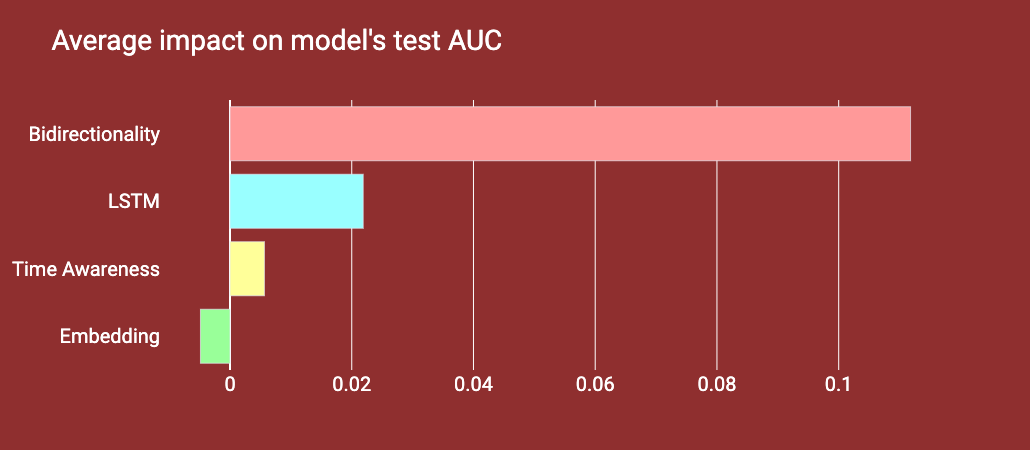

In [28]:
gain_plot_df = gain_df.copy()
gain_plot_df = gain_plot_df.sort_values(ascending=True)
# Create the figure
figure=dict(
    data=[dict(
        type='bar',
        x=gain_plot_df,
        y=gain_plot_df.index,
        orientation='h',
        marker=dict(color=marker_color)
    )],
    layout=dict(
        paper_bgcolor=background_color,
        plot_bgcolor=background_color,
        title='Average impact on model\'s test AUC',
        yaxis_title=gain_plot_df.index.name,
        font=dict(
            family=font,
            size=font_size,
            color=font_color
        )
    )
)
fig = go.Figure(figure)
fig

In [29]:
pio.write_html(fig, file='thesis_component_impact.html', auto_open=True)